In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [2]:
athleteData = pd.read_csv('athlete_events.csv')
athleteData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Analysis between Variables - Events and Medal Tally

In [3]:
Ice_Hockey_data = athleteData[athleteData["Sport"] == "Ice Hockey"]
Ice_Hockey_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
672,391,Clarence John Abel,M,23.0,185.0,102.0,United States,USA,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
673,392,George Gordon Abel,M,35.0,NaN,NaN,Canada,CAN,1952 Winter,1952,Winter,Oslo,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
923,523,Trond Sevg Abrahamsen,M,19.0,183.0,87.0,Norway,NOR,1980 Winter,1980,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN


In [4]:
print(Ice_Hockey_data["Medal"].value_counts())
print("\nThe most number of participants in Ice Hockey, in the history of Olympics, come from:")
print(Ice_Hockey_data['NOC'].value_counts().nlargest(5))

Silver    515
Gold      508
Bronze    507
Name: Medal, dtype: int64

The most number of participants in Ice Hockey, in the history of Olympics, come from:
USA    498
SWE    486
CAN    469
FIN    420
SUI    341
Name: NOC, dtype: int64


In [5]:
print("The most no. of medals from Ice Hockey were won by:")
print(Ice_Hockey_data['NOC'].value_counts().nlargest(5))
print("\nThe most no. of Gold Medals from Ice Hockey came from:")
Ice_Hockey_data_Gold = Ice_Hockey_data[Ice_Hockey_data["Medal"] == "Gold"]
print(Ice_Hockey_data_Gold['NOC'].value_counts().nlargest(5))

The most no. of medals from Ice Hockey were won by:
USA    498
SWE    486
CAN    469
FIN    420
SUI    341
Name: NOC, dtype: int64

The most no. of Gold Medals from Ice Hockey came from:
CAN    220
URS    131
USA     56
SWE     46
EUN     22
Name: NOC, dtype: int64


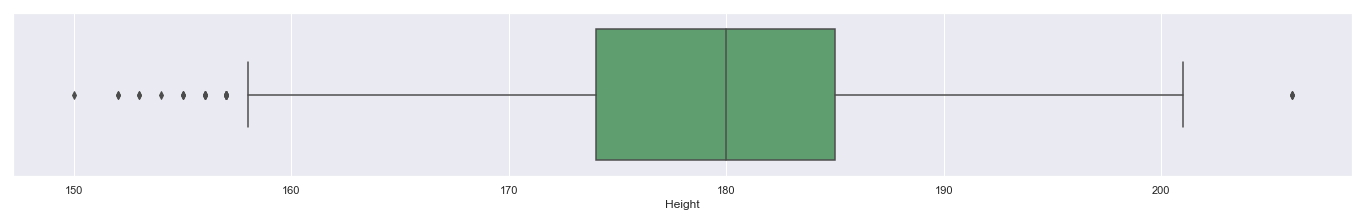

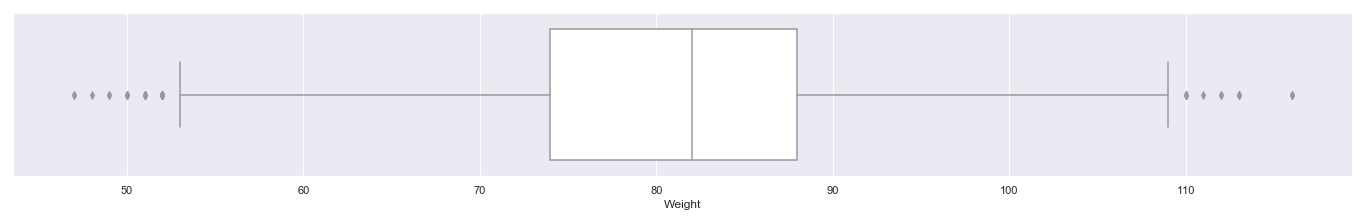

In [6]:
f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Ice_Hockey_data['Height'], orient = "h", color = 'g')

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Ice_Hockey_data['Weight'], orient = "h", color = 'w')

None      293
Silver     43
Gold       43
Bronze     41
Name: Medal, dtype: int64


C:\Users\tkjie\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


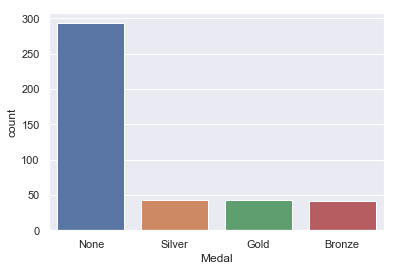

In [7]:
Ice_Hockey_data_Vancouver2010 = Ice_Hockey_data[Ice_Hockey_data["Year"] == 2010]
Ice_Hockey_data_Vancouver2010['Medal'].fillna('None', inplace = True)
print(Ice_Hockey_data_Vancouver2010["Medal"].value_counts())
sb.countplot(Ice_Hockey_data_Vancouver2010["Medal"], order = Ice_Hockey_data_Vancouver2010["Medal"].value_counts().index)

C:\Users\tkjie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


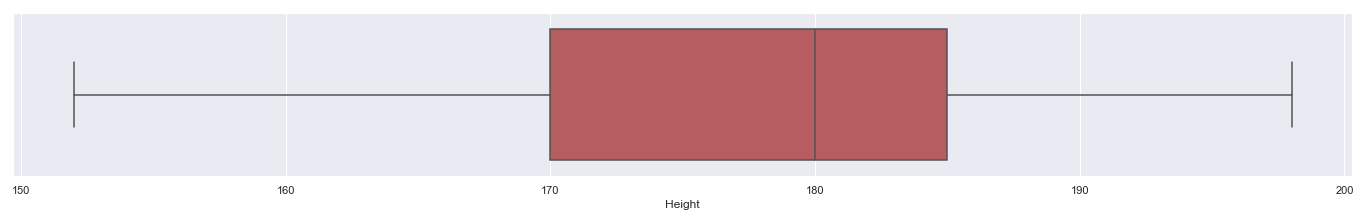

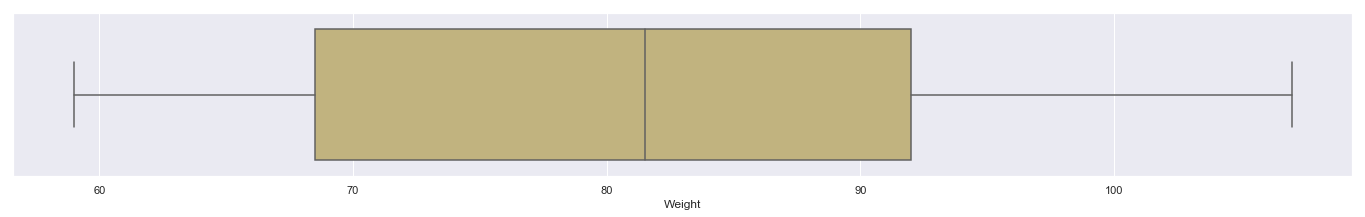

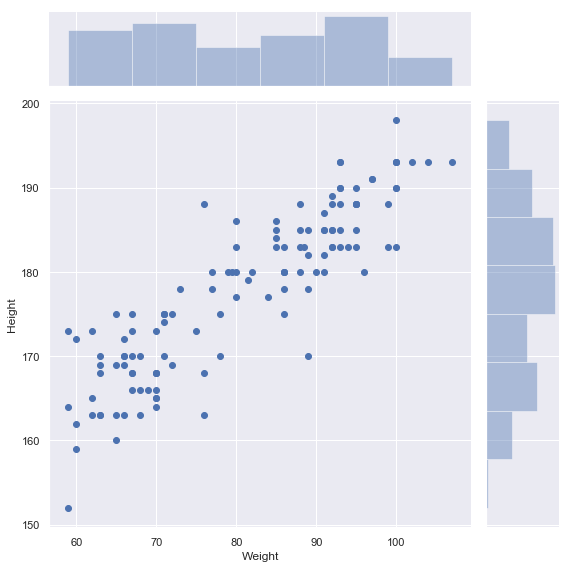

In [8]:
Ice_Hockey_data_Vancouver2010_win = Ice_Hockey_data_Vancouver2010[Ice_Hockey_data_Vancouver2010["Medal"] != "None"]
Ice_Hockey_data_Vancouver2010_win_NoDupid = Ice_Hockey_data_Vancouver2010_win.drop_duplicates()

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Ice_Hockey_data_Vancouver2010_win_NoDupid['Height'], orient = "h", color = 'r')

f, axes = plt.subplots(1, 1, figsize=(24, 3))
sb.boxplot(Ice_Hockey_data_Vancouver2010_win_NoDupid['Weight'], orient = "h", color = 'y')

sb.jointplot(x = Ice_Hockey_data_Vancouver2010_win_NoDupid['Weight'], y = Ice_Hockey_data_Vancouver2010_win_NoDupid['Height'], height = 8)

In [9]:
dataset_Height = pd.DataFrame(Ice_Hockey_data_Vancouver2010_win_NoDupid['Height'])
dataset_Weight = pd.DataFrame(Ice_Hockey_data_Vancouver2010_win_NoDupid['Weight'])
dataset_Height.describe().round(2)

,Height
count,127.00
mean,177.83
std,9.69
min,152.00
25%,170.00
50%,180.00
75%,185.00
max,198.00


In [10]:
dataset_Weight.describe().round(2)

,Weight
count,127.00
mean,80.74
std,13.05
min,59.00
25%,68.50
50%,81.50
75%,92.00
max,107.00


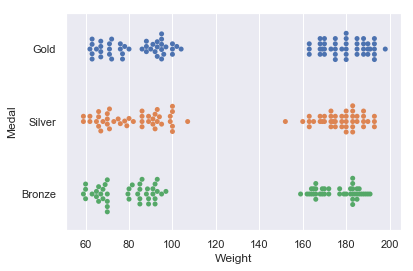

In [11]:
sb.swarmplot(x = "Height", y = "Medal", data = Ice_Hockey_data_Vancouver2010_win_NoDupid, orient = "h")
sb.swarmplot(x = "Weight", y = "Medal", data = Ice_Hockey_data_Vancouver2010_win_NoDupid, orient = "h")

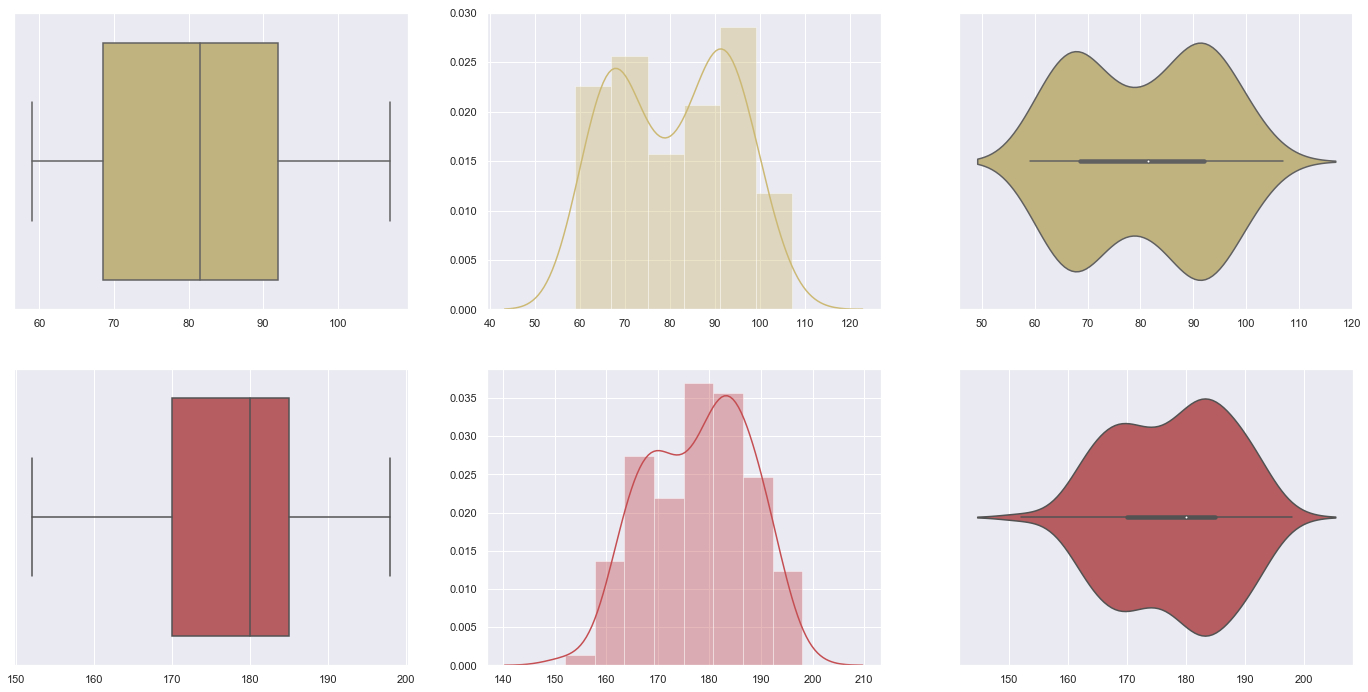

In [12]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(dataset_Weight, orient = "h", ax = axes[0,0], color = 'y')
sb.distplot(dataset_Weight, kde = True, ax = axes[0,1], color = 'y')
sb.violinplot(dataset_Weight, ax = axes[0,2], color = 'y')

# Plot the basic uni-variate figures for Total Train
sb.boxplot(dataset_Height, orient = "h", ax = axes[1,0], color = 'r')
sb.distplot(dataset_Height, kde = True, ax = axes[1,1], color = 'r')
sb.violinplot(dataset_Height, ax = axes[1,2], color = 'r')

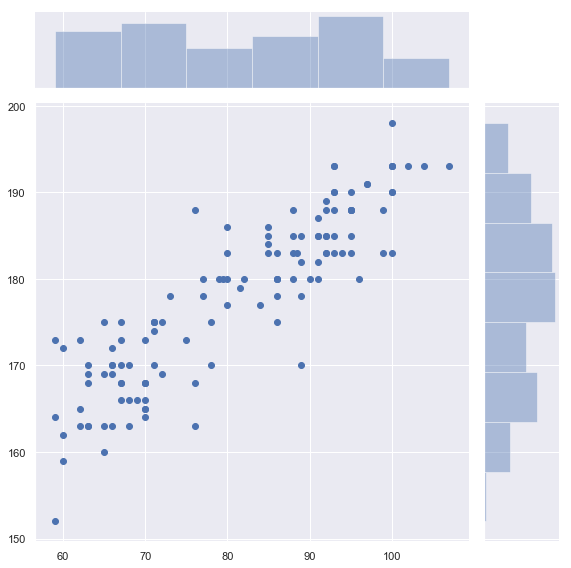

In [13]:
sb.jointplot(dataset_Weight, dataset_Height, height = 8)

Intercept 	: b =  [124.52639634]
Coefficients 	: a =  [[0.66011484]]


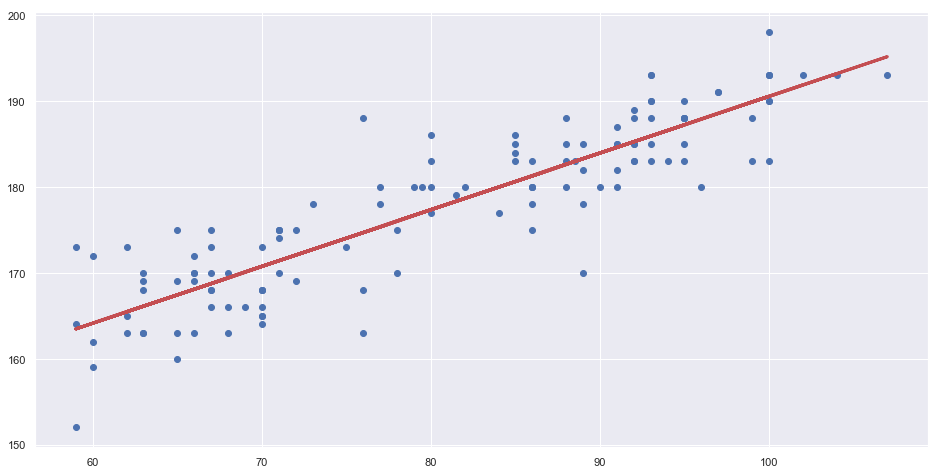

In [14]:
linreg.fit(dataset_Weight, dataset_Height)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression line
regline_x = dataset_Weight
regline_y = linreg.intercept_ + linreg.coef_ * dataset_Weight

# function to plot the line and scatter plot
# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(dataset_Weight, dataset_Height)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

It seems like the no. of datasets are different. Hence need to do spliting.

In [15]:
Ice_Hockey_data_2006 = Ice_Hockey_data[Ice_Hockey_data["Year"] == 2006]
Ice_Hockey_data_2006['Medal'].fillna('None', inplace = True)
Ice_Hockey_data_2006_win = Ice_Hockey_data_2006[Ice_Hockey_data_2006["Medal"] != "None"]
Ice_Hockey_data_2006_win_NoDupid = Ice_Hockey_data_2006_win.drop_duplicates()
Weight_Test = pd.DataFrame(Ice_Hockey_data_2006_win['Weight'])
Height_Test = pd.DataFrame(Ice_Hockey_data_2006_win['Height'])
Height_Test = pd.DataFrame(Height_Test[:127])
Weight_Test = pd.DataFrame(Weight_Test[:127])
print(len(Weight_Test), len(Height_Test))

127 127


C:\Users\tkjie\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


127


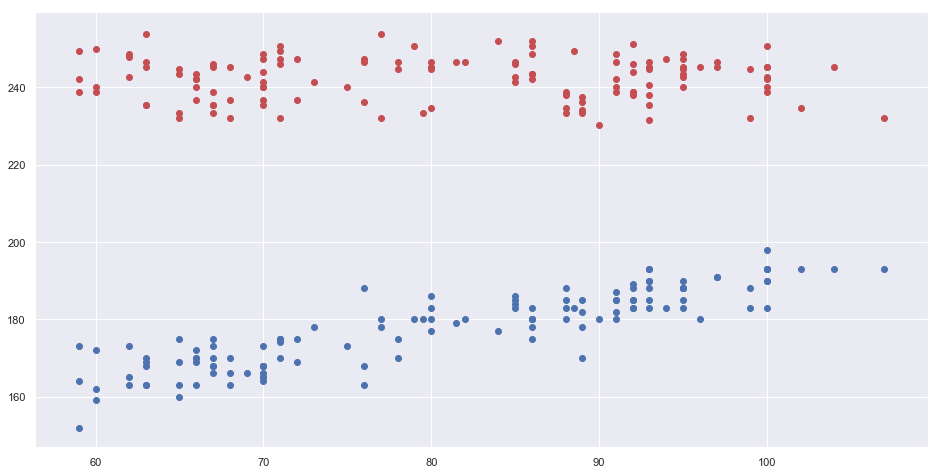

In [16]:
Height_pred = linreg.predict(Height_Test)
print(len(Height_pred))

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(dataset_Weight, dataset_Height)
plt.scatter(dataset_Weight, Height_pred, color = "r")
plt.show()

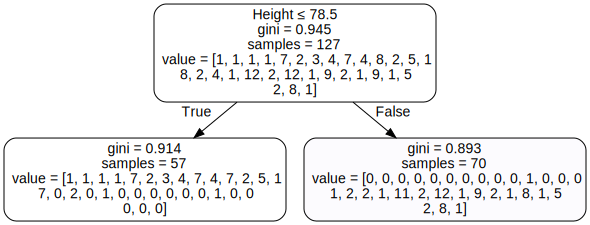

In [17]:
dectree = DecisionTreeClassifier(max_depth = 1)
dectree.fit(dataset_Weight, dataset_Height)
# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,
                          feature_names = dataset_Height.columns,
                          out_file = None,
                          filled = True,
                          rounded = True,
                          special_characters = True)
# Render using graphviz
graphviz.Source(treedot)

### Analysis into Sports and its Events

In [18]:
Bobsleigh_Data = pd.DataFrame(athleteData[athleteData["Sport"] == "Bobsleigh"])
print("There are", len(Bobsleigh_Data), "data points in Bobsleigh_Data.")
Bobsleigh_Data.head(21)

There are 3058 data points in Bobsleigh_Data.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
99,35,Dagfinn Sverre Aarskog,M,24.0,190.0,98.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
626,363,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972 Winter,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Two,NaN
627,363,Kazumi Abe,M,24.0,178.0,67.0,Japan-1,JPN,1972 Winter,1972,Winter,Sapporo,Bobsleigh,Bobsleigh Men's Four,NaN
628,363,Kazumi Abe,M,28.0,178.0,67.0,Japan-1,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Two,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN
978,550,Dmitry Vladimirovich Abramovich,M,27.0,182.0,96.0,Russia-2,RUS,2010 Winter,2010,Winter,Vancouver,Bobsleigh,Bobsleigh Men's Two,NaN
979,550,Dmitry Vladimirovich Abramovich,M,27.0,182.0,96.0,Russia-1,RUS,2010 Winter,2010,Winter,Vancouver,Bobsleigh,Bobsleigh Men's Four,NaN
1187,665,Gilbert Achard-Picard,M,29.0,NaN,NaN,France-2,FRA,1948 Winter,1948,Winter,Sankt Moritz,Bobsleigh,Bobsleigh Men's Four,NaN
1253,705,Donat Acklin,M,22.0,190.0,99.0,Switzerland-2,SUI,1988 Winter,1988,Winter,Calgary,Bobsleigh,Bobsleigh Men's Two,NaN
1254,705,Donat Acklin,M,26.0,190.0,99.0,Switzerland-1,SUI,1992 Winter,1992,Winter,Albertville,Bobsleigh,Bobsleigh Men's Two,Gold
